In [21]:
# Enable reload
# Reload modules before executing user code
%load_ext autoreload
# Reload all modules every time before executing the Python code
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:

from utils.preprocess import *
import glob
import pandas as pd
import numpy as np

from PIL import Image, ImageDraw, ImageFilter
import copy 
from tqdm import tqdm

In [23]:
DATA_PATH = "data"

In [24]:
df_train = pd.read_csv(f'{DATA_PATH}/extra.csv')
df_blank_classes = df_train[df_train['labels'] == '0']
df_blank_classes

,filename,labels
0,MrtSutthisan_img_13-7802206_100-5717337_a257_s...,0
1,MrtSutthisan_img_13-7802824_100-5717195_a3_s90...,0
2,MrtSutthisan_img_13-7803048_100-5713201_a183_s...,0
3,MrtSutthisan_img_13-7813255_100-5697035_a183_s...,0
5,MrtSutthisan_img_13-7813311_100-5696037_a3_s90...,0
...,...,...
5879,img_13-763776_100-5405508_a206-6126443_s116-61...,0
5880,img_13-763776_100-5405508_a206-6126443_s296-61...,0
5881,img_13-7637828_100-5414336_a34-50663039_s124-5...,0
5884,img_13-7667727_100-5356214_a25-41138042_s115-4...,0


MrtSutthisan_img_13-7802206_100-5717337_a257_s270_y75_f90_0.jpg


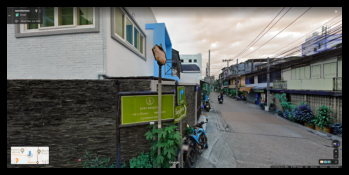

In [25]:
f_path = df_blank_classes.filename[0]
print(f_path)
imshow("data/extra/"+f_path)

FileName:
img_13-81365_100-5697187_a74-85537991_s344-85537991_y0_f90_1.jpg
530
img_origin:  (640, 640, 3)
img_resize:  (512, 512, 3)


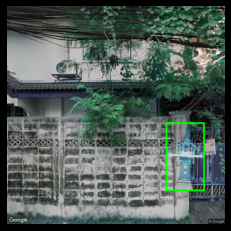

FileName:
img_13-8062867_100-5957311_a82-5112971778794_s172-51129717787938_y0_f90_1.jpg
534
img_origin:  (640, 640, 3)
img_resize:  (512, 512, 3)


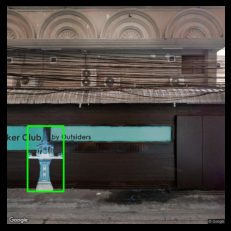

FileName:
img_13-7869413_100-5711843_a352-985212334177_s82-98521233417699_y0_f90_1.jpg
579
img_origin:  (640, 640, 3)
img_resize:  (512, 512, 3)


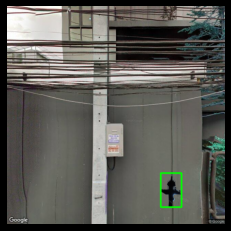

FileName:
img_13-7962334_100-5937335_a267-028433104972_s357-028433104972_y0_f90_1.jpg
564
img_origin:  (640, 640, 3)
img_resize:  (512, 512, 3)


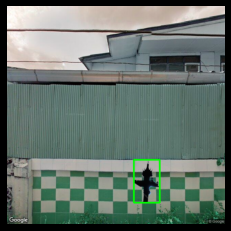

FileName:
MrtSutthisan_img_13-7869696_100-5666117_a358_s270_y75_f90_0.jpg
1777
img_origin:  (925, 1920, 3)
img_resize:  (740, 1536, 3)


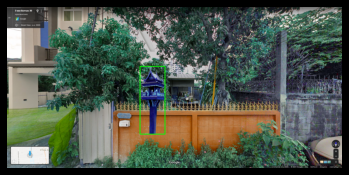

FileName:
MrtSutthisan_img_13-7921207_100-5673405_a354_s270_y75_f90_0.jpg
1565
img_origin:  (925, 1920, 3)
img_resize:  (740, 1536, 3)


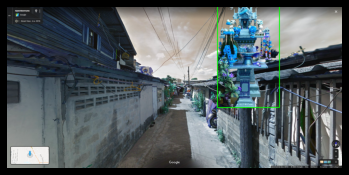

FileName:
img_13-7872453_100-6189619_a99-54079189_s9-54079188999998_y0_f90_1.jpg
498
img_origin:  (640, 640, 3)
img_resize:  (512, 512, 3)


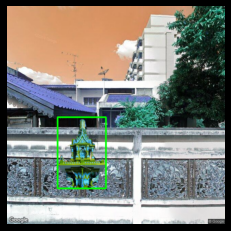

FileName:
img_13-8436401_100-6025936_a141-1705275_s51-17052749999999_y0_f90_1.jpg
578
img_origin:  (640, 640, 3)
img_resize:  (512, 512, 3)


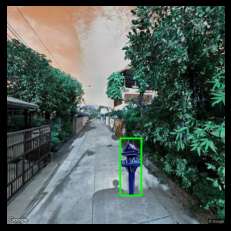

FileName:
img_13-845532_100-5851554_a350-9932051_s80-99320510000001_y0_f90_1.jpg
580
img_origin:  (640, 640, 3)
img_resize:  (512, 512, 3)


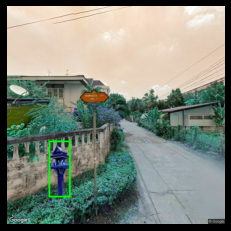

FileName:
img_13-8365971_100-5678278_a356-9633235_s266-9633235_y0_f90_1.jpg
584
img_origin:  (640, 640, 3)
img_resize:  (512, 512, 3)


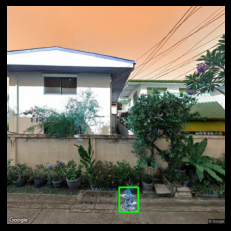

In [26]:
from PIL import Image, ImageDraw, ImageFilter, ImageOps
from numpy.random import randint
import copy 
TRAIN_PATH = f'{DATA_PATH}/extra/'
shine_paths = glob.glob('shrine/*')

n_images = 10
file_name_sample = df_blank_classes['filename'].sample(n_images).values
for i in range(n_images):
    print('FileName:')
    print(file_name_sample[i])
    background = Image.open(TRAIN_PATH + file_name_sample[i])
    frontImage = Image.open(shine_paths[randint(len(shine_paths))])

    frontImage = augment_image(frontImage)

    if background.width <= 640:
        frontImage = resize_pil(frontImage)

    # width = (background.width -  frontImage.width)//2
    print(abs(background.width -  frontImage.width))
    width = np.random.randint(abs(background.width -  frontImage.width))
    # height= int((background.height - frontImage.height)//2  + frontImage.height/1.5)
    height = int(background.height - frontImage.height*1.5)

    img_merged = copy.deepcopy(background)
    img_merged.paste(frontImage, (width, height), frontImage)
    img_merged = np.array(img_merged)

    # Blue color in BGR
    color = (0, 255, 0)
    thickness = 4   # Line thickness of 2 px
    start_point = (width, height)
    end_point   = (width + frontImage.width, height + frontImage.height)
    cv2.rectangle(img_merged, start_point, end_point, color, thickness)
    imshow(img_merged, scale=0.8, verbose=True)

# COCO Format

In [27]:
# from scipy.ndimage.interpolation import rotage
from PIL import ImageOps

def gen_box(path_bg, path_fg):
    background = Image.open(path_bg)
    frontImage = Image.open(path_fg)

    frontImage = augment_image(frontImage)

    if background.width <= 640:
        frontImage = resize_pil(frontImage)

    # width = (background.width -  frontImage.width)//2
    # print(abs(background.width -  frontImage.width))
    width = np.random.randint(abs(background.width -  frontImage.width))
    height= (background.height - frontImage.height)//2

    img_merged = copy.deepcopy(background)
    img_merged.paste(frontImage, (width, height), frontImage)
    img_merged = np.array(img_merged)

    start_point = (width, height)
    end_point   = (width + frontImage.width, height + frontImage.height)

    # DEBUG
    # cv2.rectangle(img_merged, start_point, end_point, color, thickness)
    # imshow(img_merged, scale=0.8, verbose=True)
    return img_merged, [start_point, end_point, background.width, background.height]


def pt_to_yolo(class_index, point_1, point_2, width, height):
    # YOLO wants everything normalized
    # Order: class x_center y_center x_width y_height
    x_center = (point_2[0] + point_1[0]) / float(2*width)
    y_center = (point_2[1] + point_1[1]) / float(2*height)
    x_width = float(abs(point_2[0] - point_1[0])) / width
    y_height = float(abs(point_2[1] - point_1[1])) / height
    return class_index, x_center, y_center, x_width, y_height

def plot_yolo_box(img, label, lavel_name):
    Y, X = img.shape[0:2]
    img_class, x_c, y_c, w, h = label
    p1 = (int((x_c - w/2)*X), int((y_c - h/2)*Y))
    p2 = (int((x_c + w/2)*X), int((y_c + h/2)*Y))
    print(p1, p2)
    color = (255,0,0)
    thickness = 1
    return cv2.rectangle(img, p1, p2, color, thickness)

###______________GEN LAB

def yolo_format(class_index, point_1, point_2, width, height):
    # YOLO wants everything normalized
    # Order: class x_center y_center x_width y_height
    x_center = (point_2[0] + point_1[0]) / float(2*width)
    y_center = (point_2[1] + point_1[1]) / float(2*height)
    x_width = float(abs(point_2[0] - point_1[0])) / width
    y_height = float(abs(point_2[1] - point_1[1])) / height
    return str(int(class_index)) + " " + str(x_center) \
       + " " + str(y_center) + " " + str(x_width) + " " + str(y_height)
  
def save_yolo_file(txt_path, line):
    with open(txt_path, 'w') as myfile:
        myfile.write(line + "\n") # append line

def dataframe_to_yolo_f(df, img_class=0, PATH='/content/dataset/labels'):
    n_files = len(glob.glob(PATH+'/*.txt'))
    for i in df.index:
        line = yolo_format((int(img_class)), *df.iloc[i].values)
        save_yolo_file(f'{PATH}/img_{i+n_files}.txt', line)

def plt_imshow(img):
    plt.figure(dpi=100)
    plt.imshow(img)
    plt.grid(False)
    plt.axis(False)

def save_image(img_list, PATH = '/content/dataset/images'):
    n_files = len(glob.glob(PATH+'/*.jpg'))
    for i, img_ in enumerate(img_list):
        plt.imsave(f'{PATH}/img_{i+n_files}.jpg', img_)

In [30]:
def generate_yolo_dataset(TRAIN_PATH, class_label=3):
    '''
    CLASS
    [ 0         1          2       3       4     ]
    ['cctv', 'carpark', 'car', 'shrine', 'garden']
    '''

    map_label_dict = {i: j for i, j in enumerate(['cctv', 'carpark', 'car', 'shrine', 'garden'])}
    class_label_name = map_label_dict[class_label]
    object_paths = glob.glob(f'/content/{class_label_name}/*')
    # TRAIN_PATH = '/content/content/properties-tagging-merged/train/'
    loc_list = []
    img_list = []

    n_images = 1000

    file_name_sample = df_blank_classes['filename'].sample(n_images).values
    for i in tqdm(range(n_images)):
        path_bg = TRAIN_PATH + file_name_sample[i]
        path_fg = object_paths[randint(len(object_paths))]
        img_merged, loc = gen_box(path_bg, path_fg)

        # # DEBUG
        # img_merged = plot_yolo_box(img_merged, pt_to_yolo(0, *loc), 'TNANA')
        # imshow(img_merged, scale=0.8, verbose=True)
        img_list.append(img_merged)
        loc_list.append(loc)

    # Save File
    save_image(img_list, PATH = '/content/dataset/images')
    df_loc = pd.DataFrame(loc_list, columns=['point_1', 'point_2', 'width', 'height'])

    dataframe_to_yolo_f(df_loc, img_class=class_label)

# generate_yolo_dataset(class_label=3) # shrine
# generate_yolo_dataset(class_label=0) # cctv

In [ ]:
generate_yolo_dataset()